<a href="https://colab.research.google.com/github/Analyst-Rhoda/Brainwave_Matrix_Intern/blob/main/Electronic_store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [ ]:
df = pd.read_csv('/content/Electronic Sales.csv')

In [ ]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,20 03 2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,20 04 2024,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,17 10 2023,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,09 08 2024,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,21 05 2024,Express,Accessory,35.56


In [ ]:
df.shape
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Loyalty Member,object
Product Type,object
SKU,object
Rating,int64
Order Status,object
Payment Method,object
Total Price,float64


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-8-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [ ]:
# Replace blank/missing Add-ons Purchased with "No Add-ons"
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('No Add-ons')
df['Add-ons Purchased'].replace('', 'No Add-ons', inplace=True)

<ipython-input-9-1507eef13833>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Add-ons Purchased'].replace('', 'No Add-ons', inplace=True)


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst=True, errors='coerce')

In [ ]:
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Day'] = df['Purchase Date'].dt.day

In [ ]:
df['Add-on Count'] = df['Add-ons Purchased'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

In [ ]:
df['Is Loyalty Member'] = df['Loyalty Member'].map({'Yes': 1, 'No': 0})

BUSINESS QUESTIONS

1. Total Revenue by product

In [ ]:
df['Total Price'] = pd.to_numeric(df['Total Price'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Add-on Total'] = pd.to_numeric(df['Add-on Total'], errors='coerce')

In [ ]:
product_sales = df.groupby('Product Type')['Total Price'].sum().sort_values(ascending=False)

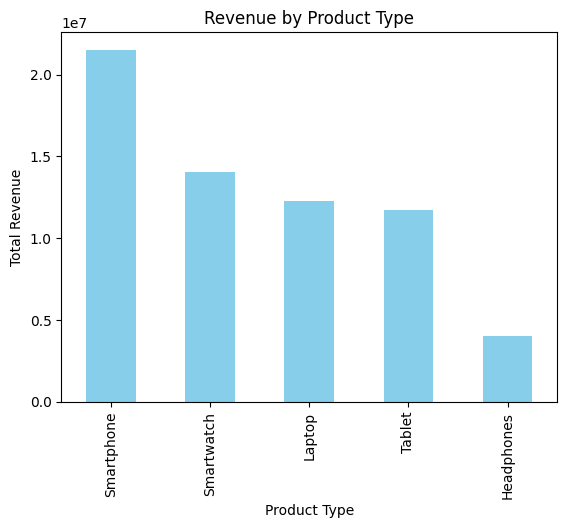

In [ ]:
product_sales.plot(kind='bar', title='Revenue by Product Type', color='skyblue')
plt.ylabel('Total Revenue')
plt.show()

2. Monthly sales trend

In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst=True)
df['Month'] = df['Purchase Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('Month')['Total Price'].sum()

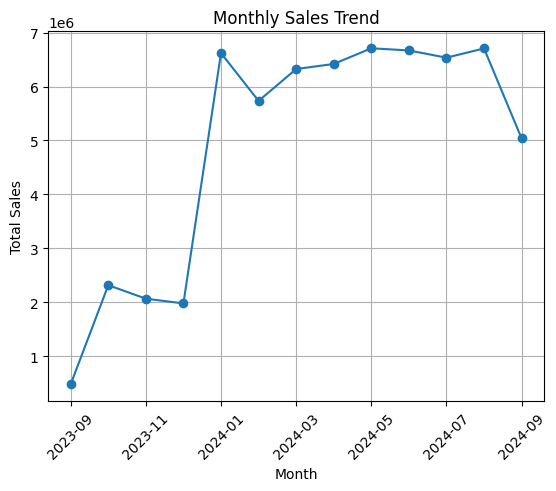

In [ ]:
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

3. Return rate by product

In [ ]:
cancelled = df[df['Order Status'] == 'Cancelled'].groupby('Product Type')['Order Status'].count()
total_orders = df.groupby('Product Type')['Order Status'].count()

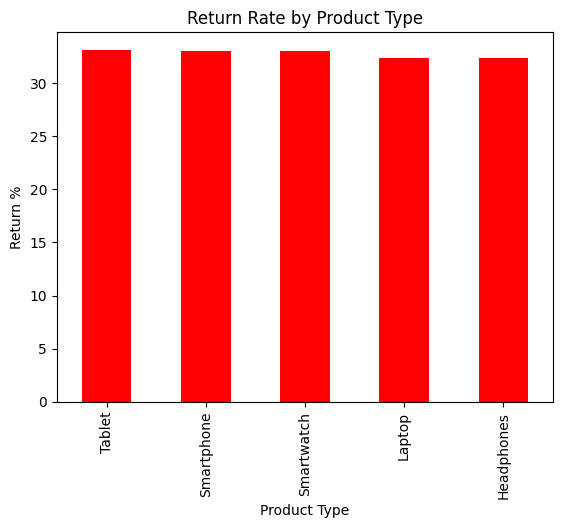

In [ ]:
return_rate = (cancelled / total_orders * 100).sort_values(ascending=False)
return_rate.plot(kind='bar', title='Return Rate by Product Type', color='red')
plt.ylabel('Return %')
plt.show()

4. Loyalty Member Spending

In [ ]:
loyalty_sales = df.groupby('Loyalty Member')['Total Price'].mean()

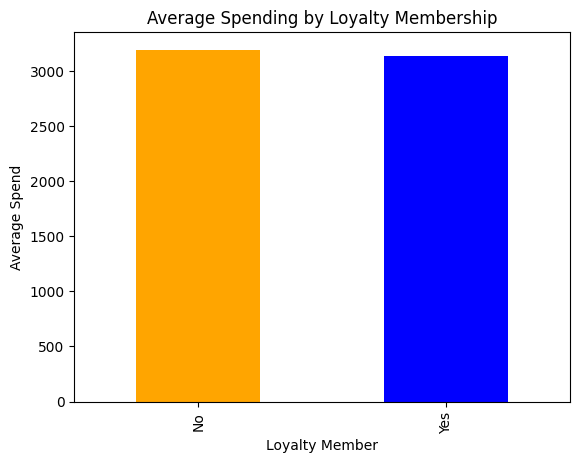

In [ ]:
loyalty_sales.plot(kind='bar', title='Average Spending by Loyalty Membership', color=['orange', 'blue'])
plt.ylabel('Average Spend')
plt.show()

5. Add-on impact on spending

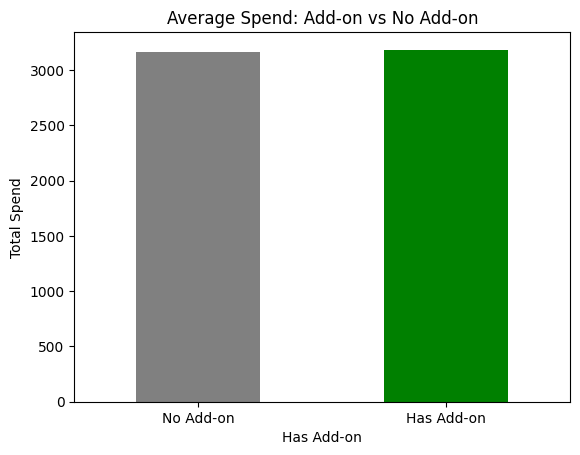

In [ ]:
df['Has Add-on'] = df['Add-ons Purchased'].apply(lambda x: x != 'No Add-ons')

addon_impact = df.groupby('Has Add-on')['Total Price'].mean()

addon_impact.plot(kind='bar', title='Average Spend: Add-on vs No Add-on', color=['gray', 'green'])
plt.ylabel('Total Spend')
plt.xticks([0, 1], ['No Add-on', 'Has Add-on'], rotation=0)
plt.show()

6. Payment Method Popularity

In [ ]:
# Standardize Payment Method values to Title Case (e.g., "Paypal" and "PayPal" → "PayPal")
df['Payment Method'] = df['Payment Method'].str.strip().str.title()

In [ ]:
df['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

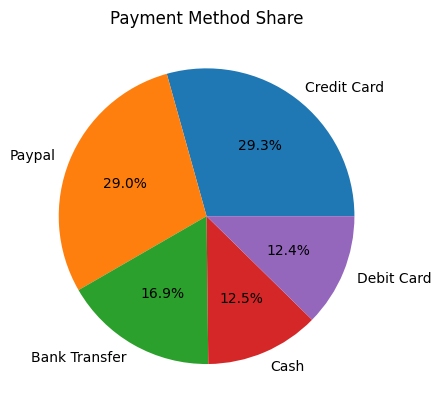

In [ ]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Method Share')
plt.ylabel('')
plt.show()

7. Sales by age-group

<ipython-input-30-f7b061ad46b2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Price'].mean()


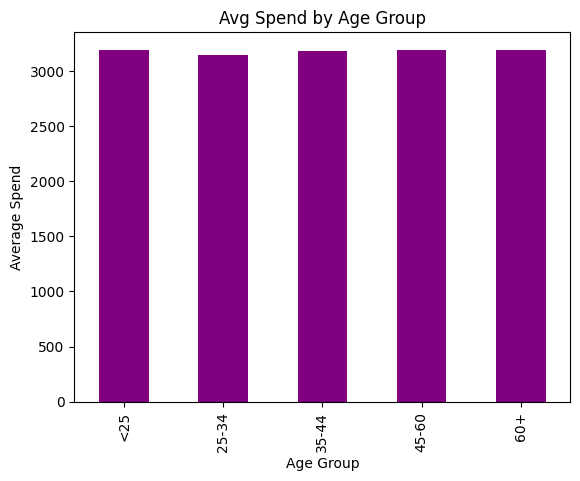

In [ ]:
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-34', '35-44', '45-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_sales = df.groupby('Age Group')['Total Price'].mean()

age_group_sales.plot(kind='bar', color='purple', title='Avg Spend by Age Group')
plt.ylabel('Average Spend')
plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(product_sales, title="Interactive Revenue by Product Type")
fig.show()

In [ ]:
# Save to CSV (without index)
df.to_csv('cleaned_electronic_sales.csv', index=False)

In [ ]:
from google.colab import files

# Download the file
files.download('cleaned_electronic_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>